<a href="https://colab.research.google.com/github/caballeroarturo/B2-Analisis-de-Datos-con-Python-2020/blob/master/Sesion-06/Ejemplo-05/binnings_hexagonales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Ejemplo 5: Binnings Hexagonales

### 1. Objetivos:
    - Aprender a generar e interpretar binnings hexagonales

---
    
### 2. Desarrollo:

In [16]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [17]:
path1 = "https://raw.githubusercontent.com/beduExpert/B2-Analisis-de-Datos-con-Python-2020/master/"
df = pd.read_csv(path1 + 'Datasets/athlete_olympic_events-clean.csv', index_col=0)

df.head()

,name,sex,age,height,weight,team,noc,games,year,season,city,sport,event,medal
athlete_id,,,,,,,,,,,,,,
1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,None
2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,None
5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,None
5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,"Speed Skating Women's 1,000 metres",None
5,Christine Jacoba Aaftink,F,25.0,185.0,82.0,Netherlands,NED,1992 Winter,1992,Winter,Albertville,Speed Skating,Speed Skating Women's 500 metres,None


Por ejemplo, mira qué pasa cuando queremos visualizar la relación entre peso y altura utilizando todos los datos de nuestro dataset:

In [18]:
df_grouped = df.groupby('name')[['height', 'weight']].max()

In [19]:
df_grouped.head()

,height,weight
name,,
Th Anh,165.0,58.0
Th Ngn Thng,147.0,47.0
Tin Tun,173.0,63.0
A Dijiang,180.0,80.0
A Lamusi,170.0,60.0


(50.0, 250.0)

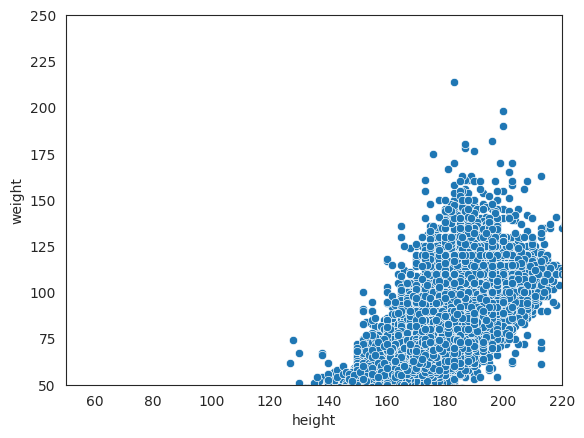

In [26]:
g = sns.scatterplot(x=df_grouped['height'], y=df_grouped['weight'])
g.set_xlim(50, 220)
g.set_ylim(50,250)

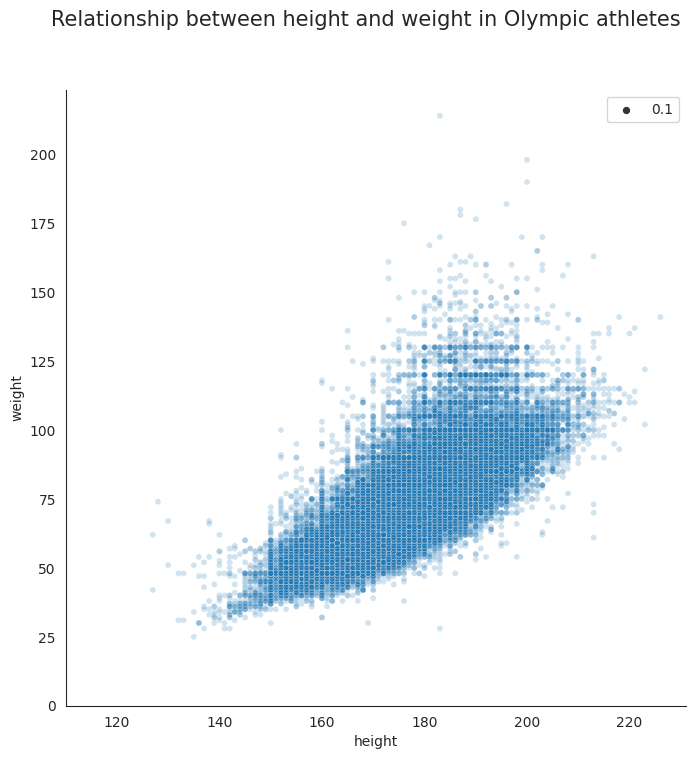

In [35]:
sns.set_style('white')
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot()

sns.scatterplot(x=df_grouped['height'], y=df_grouped['weight'], size= 0.1, alpha = 0.2, ax=ax)

fig.suptitle('Relationship between height and weight in Olympic athletes', fontsize=15)

ax.spines["top"].set_color("None")
ax.spines["right"].set_color("None")

ax.set_xlim(110)
ax.set_ylim(0);

Aunque podemos ver una forma más o menos distinguible, hay tantos puntos que es imposible discernir dónde hay más o menos densidad. Veamos ahora cómo se ven estos mismos datos pero con un binning hexagonal:

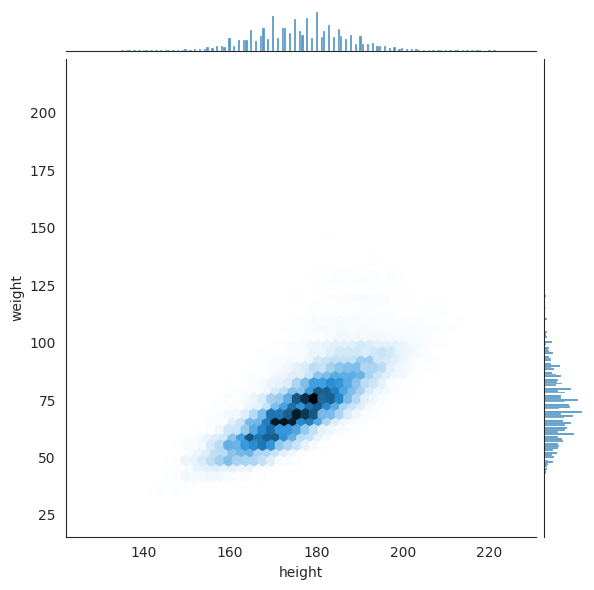

In [45]:
g=sns.jointplot(x='height', y='weight', data=df_grouped, kind='hex', ratio=10, joint_kws={'gridsize': 50})

Esta gráfica permite que visualicemos con mucho más detalle la distribución de nuestros datos. Observa también los histogramas que se encuentran en la parte superior y derecha de la gráfica. Estos histogramas nos ayudan a visualizar de qué manera participa cada variable en la densidad resultante.